In [1]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\jesud\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['Maker_Model']= df['Make']+ " " + df['Model']

In [6]:
# Select features from original dataset to form a new dataframe
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]

In [7]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [8]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})

In [9]:
# Create the list of list format of the custom corpus for gensim modeling
sent = [row.split(',') for row in df_clean['clean']]

In [10]:
# show the example of list of list format of the custom corpus for gensim modeling
sent[:2]
[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [17]:
from gensim.models import Word2Vec

#### Genism word2vec Model Training

In [18]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [19]:
model['Toyota Camry']

C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.01853376,  0.15758367, -0.04719268,  0.10100608,  0.13053007,
        0.10104162, -0.14551762, -0.10080653, -0.14082643, -0.10926438,
       -0.24911429,  0.08317363, -0.16164353,  0.24876864, -0.12936129,
        0.10133472, -0.12029164,  0.1646594 , -0.29419565,  0.12131192,
        0.1359794 , -0.12332179, -0.00579559,  0.03547899, -0.10594504,
        0.10723846,  0.00406222,  0.2450716 , -0.21863073,  0.00248461,
       -0.19670342,  0.08402744,  0.04347033, -0.17085566, -0.03786778,
        0.06157906,  0.02264647, -0.13846195,  0.08205515, -0.13218057,
       -0.04267902, -0.3004406 , -0.08026876, -0.19363824,  0.17490661,
        0.1422522 ,  0.21247031,  0.06726085,  0.05573633, -0.16930223],
      dtype=float32)

### Compute Similarities

In [20]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8438113

In [21]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.97979605

In [23]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('BMW M4', 0.9948094487190247),
 ('Mercedes-Benz SLS AMG GT', 0.9945034384727478),
 ('BMW M6', 0.9944130182266235),
 ('Ferrari California', 0.9936599731445312),
 ('Maserati Coupe', 0.9934129118919373)]

In [35]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()

In [37]:
import numpy as np
from sklearn.manifold import TSNE

In [39]:
from matplotlib import pyplot as plt

In C:\Users\jesud\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jesud\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jesud\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jesud\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jesud\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\jesud\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


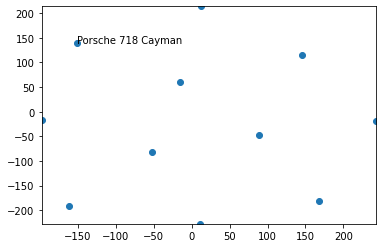

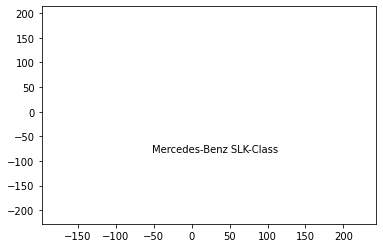

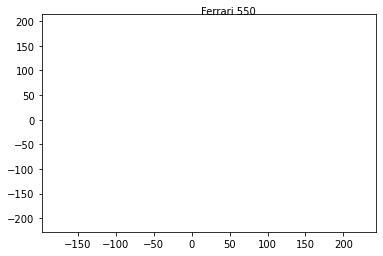

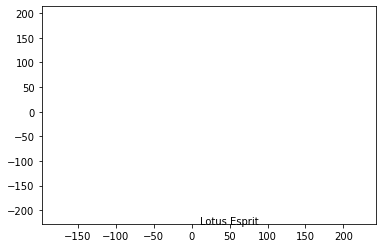

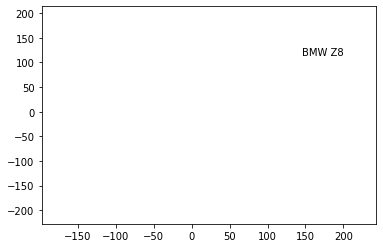

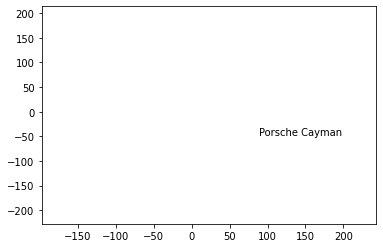

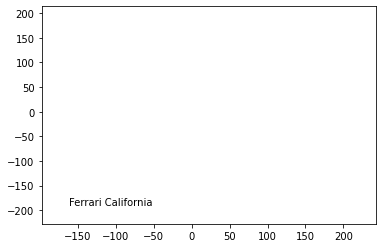

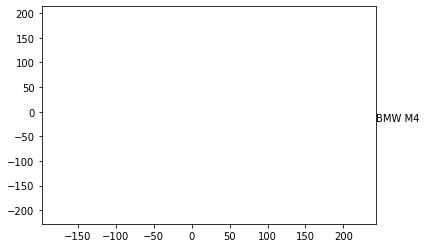

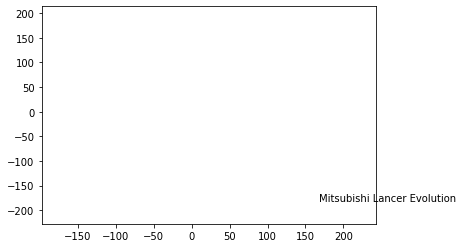

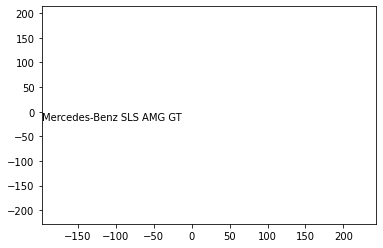

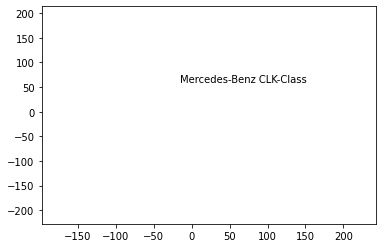

In [44]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 

In [43]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]
# only get the unique Maker_Model
Maker_Model = list(df.Maker_Model.unique()) 
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 